Having completed the instrumentation of the ETD for ETD2 and ETDRK* I would now like to compare those instrumentations versus some other ODE solvers.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
from decimal import *
getcontext().prec = 64

second order ODE solvers

In [ ]:
def ETDRK2(Total_Time, Number_of_Points, Initial_Condition, method = "taylor", debug = False):
    T = Total_Time
    N = int(Number_of_Points)
    u_0 = Initial_Condition

    h = (T/N)  ## calculate the step size based on the number of points
    tvec = np.arange(N+1)*h
    uvec = np.zeros(N+1)
    uvec[0] = u_0


    if debug:
        print("method is", method)
        print("h's value is", h, "type:", type(h))
    ## calculate coefficients to be used in the integral
    if method == "taylor":
        if debug:
            print("alpha")
        a1 = h   + (c*h**2)/2 + (c**2*h**3)/6 + (c**3*h**4)/24 ## (e^(ch)-1)/c
        b1 = h/2 + (c*h**2)/6 + (c**2*h**3)/24 ## (e^(ch) - (1 + ch))/(h*c^2)
        if debug:
            print("a1:", a1, ", b1:", b1)

    elif method == "contour":
        if debug:
            print("beta")
        M = 32  # number of points for complex means
        r = np.exp(1j * np.pi * (np.arange(1, M + 1)-0.5) / M)
        z = c*h + r
        a1 = h*np.mean((np.exp(z)-1)/z).real
        b1 =  h*np.mean((np.exp(z)-1-z)/(z**2)).real
        if debug:
            print("a1:", a1, ", b1:", b1)

    elif method == "naive":
        if debug:
            print("kappa")
        a1 = (np.exp(c*h)-1)/c
        b1 = (np.exp(c*h)-1-c*h)/(h*(c**2))
        if debug:
            print("a1:", a1, ", b1:", b1)
            
    else:
        raise ValueError("method must be contour, taylor or naive")




    for i in range(N):
        uvec[i+1] = uvec[i]*np.exp(c*h) + F(tvec[i])*a1 + (F(tvec[i+1])-F(tvec[i]))*b1
    
    return uvec,tvec

In [24]:
def ETD2(Total_Time, Number_of_Points, Initial_Condition, method = "contour", debug = False):
    T = Total_Time
    N = Number_of_Points
    u_0 = Initial_Condition

    h = T/N
    tvec = np.arange(N+1)*h
    uvec = np.zeros(N+1)
    uvec[0] = u_0

    
    if method == "contour":
        z = c*h
        M = 32  # number of points for complex means
        r = np.exp(1j * np.pi * (np.arange(1, M + 1)-0.5) / M)
        z = c*h + r

        a1 = h*np.mean(((1+z)*np.exp(z) - 1 - 2*z)/(z**2)).real
        b1 = h*np.mean((1+z-np.exp(z))/(z**2)).real
        if debug:
            print("a1:", a1, ", b1:", b1)#
    
    elif method == "naive":
        a1 = ((1+c*h)*np.exp(c*h)-1-2*c*h)/(C**2*h)
        b1 = (1+c*h-np.exp(c*h))/(c**2*h)
        if debug:
            print("a1:", a1, ", b1:", b1)#
    else:
        raise ValueError("method must be contour or naive")

    for i in range(N):
        uvec[i+1] = uvec[i]*np.exp(c*h) + F(tvec[i])*a1 + F(tvec[i-1]*b1)



    return uvec,tvec

In [12]:
def F(t):
    # our non linear component
    return np.sin(t)


In [16]:
def U_true(t,u_0):
    return u_0*np.exp(c*t) + (np.exp(c*t)-c*np.sin(t)-np.cos(t))/(1+c**2)

In [28]:
T = Total_Time = np.pi/2
N = Number_of_Points = 1000
u_0 = Initial_Condition = 1
c = -100
h = T/N ## calculate the step size based on the number of points
tvec = np.arange(N+1)*h

A bit of testing with the ETD2 method

In [54]:
errorN = 14
c = -100
## h = np.pi/(2*N)
## N = np.int((1.6)*10**)
Test_N = np.zeros(errorN)


for i in range(0,errorN):
    Test_N[i] = int((np.pi/2)*(10**(1+i/2)))
Test_H  = (np.pi/2)/Test_N

In [55]:
Error_Vec1 =np.zeros(errorN)
Error_Vec2 = np.zeros(errorN)
Error_Vec3 = np.zeros(errorN)
#k = np.array([])
time_start = time.time()
for i in range(0, errorN):
    print("you are", round(i/errorN,2)*100, "% complete,", round(time_now-time_start,2), "seconds have elapsed and you are on step", i)
    
    (y1,x) = ETDRK2(T, Test_N[i], u_0, method="naive")
    #(y2,x) = ETDRK2(T, Test_N[i], u_0, method="taylor")
    (y3,x) = ETDRK2(T, Test_N[i], u_0, method="contour", debug = True
    )

    #print(x.size)
    yTrue = U_true(x,u_0)
    y_tfinal = yTrue[-1]
    
    #if i == 6:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    #elif i == 12:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    #k = np.append(k,np.abs((y1[-1] - yTrue[-1])/yTrue[-1]))
    time_now = time.time()
    
    Error_Vec1[i] = np.abs((y1[-1] - yTrue[-1])/yTrue[-1])
    #Error_Vec2[i] = np.abs((y2[-1] - yTrue[-1])/yTrue[-1])
    Error_Vec3[i] = np.abs((y3[-1] - yTrue[-1])/yTrue[-1])

kappa
method is contour
h's value is 0.10471975511965977 type: <class 'float'>
beta
a1: 0.00999971680940855 , b1: 0.009045097384158108
you are 0.0 % complete, 0.0 seconds have elapsed and you are on step 0
kappa
method is contour
h's value is 0.0320570678937734 type: <class 'float'>
beta
a1: 0.009594697548347242 , b1: 0.007006994657109341
you are 7.000000000000001 % complete, 0.0 seconds have elapsed and you are on step 1
kappa
method is contour
h's value is 0.010005072145190424 type: <class 'float'>
beta
a1: 0.0063230710530883605 , b1: 0.003680134474464592
you are 14.000000000000002 % complete, 0.0 seconds have elapsed and you are on step 2
kappa
method is contour
h's value is 0.0031669280782155172 type: <class 'float'>
beta
a1: 0.0027144547299427437 , b1: 0.0014287452606998585
you are 21.0 % complete, 0.01 seconds have elapsed and you are on step 3
kappa
method is contour
h's value is 0.0010005072145190424 type: <class 'float'>
beta
a1: 0.0009520847546771808 , b1: 0.00048397911718346

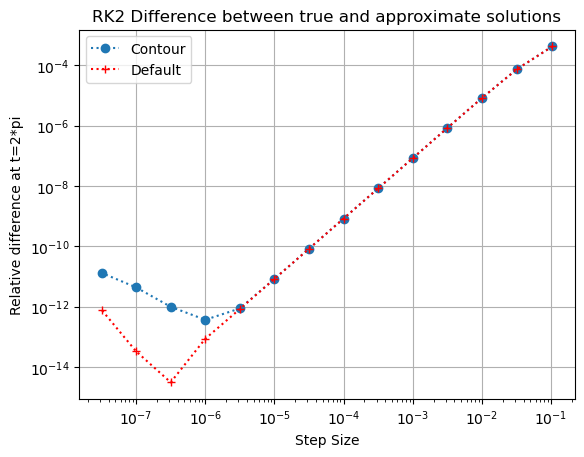

In [56]:
plt.loglog(Test_H, Error_Vec3, ':o', label = "Contour")
#plt.loglog(Test_H, Error_Vec2, ':x', label = "Taylor Series")
plt.loglog(Test_H, Error_Vec1, 'r:+', label = "Default")
#plt.loglog([1e-2,1],[1e-11,1e-3],'k-')
plt.xlabel("Step Size")
plt.ylabel("Relative difference at t=2*pi")
plt.title("RK2 Difference between true and approximate solutions")
plt.legend()
plt.grid()